![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and Pedro Angelo Medeiros Fonini
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def veryclose(v1,v2):
    return np.allclose(v1, v2, atol=1e-13, rtol=1e-13)

In [27]:
def lagrange(xs, ys):
    """Retorna o polinômio interpolador de lagrange baseado nos pontos (xs,ys).
    """
    assert len(xs) == len(ys)
    def pn(x):
        l_coef = []
        for indice in range(len(xs)):
            L = 1
            for j in range(len(xs)):
                if indice!= j:
                    L *= (x - np.array(xs[j]))/(np.array(xs[indice]) - np.array(xs[j]))
            l_coef.append(L)
        poli = 0
        
        for i in range(len(l_coef)):
            poli += ys[i]*l_coef[i]
        return poli    
    return pn

In [13]:
def lagrange(xs, ys):
    assert len(xs) == len(ys)
    def pn(x):
        l_coef = []
        for indice in range(len(xs)):
            L = 1
            for j in range(len(xs)):
                if indice!= j:
                    L *= (x - np.array(xs[j]))/(np.array(xs[indice]) - np.array(xs[j]))
            l_coef.append(L)
        
        return l_coef
    return pn

In [14]:
x1 = [0,2,4]
y1 = [1,5,17]
x11 = 4

p = lagrange(x1,y1)(x11)
p

[0.0, -0.0, 1.0]

In [49]:
plt.nbgrader()

ModuleNotFoundError: No module named 'nbgrader'

# Parte 1: Interpolação e Derivação

## Questão 1: Derivando a interpolação

Escreva uma função que, dados pontos $(x_i, y_i)$,
retorna os coeficientes da **derivada** do polinômio interpolador de Lagrange.

In [25]:
def f(x): return x**2
def g(x): return x**5 - x - 1

In [15]:
def df(f, H=1e-5):
    """Retorna a função derivada de  f.
    """
    def aux(x):
        return (f(x+H) - f(x-H))/(2*H)
    return aux

def df_analitica(coefs:list) -> list:
    """Retorna os coeficientes da derivada de  f. 
    
    f é um polinômio de coeficientes coefs.
    
    Exemplo
    -------
    coefs = [1,0,2]  ->  f(x) = 1 + 2x**2
    
    Retorna: [0, 4]  ->  f'(x) = 4*x
    """
    ans = []
    for grau, coef in enumerate(coefs):
        ans.append(grau*coef) # Derivamos termo a termo
        
    return ans[1:] # Removemos o termo cujo grau inicial era 0

In [20]:
def lagrange_coefs_linha(xs, ys):
    """Retorna os coeficientes da derivada do polinômio interpolador de Lagrange baseado em (xs,ys).
    """
    xs, ys = np.asarray(xs), np.asarray(ys)
    assert len(xs) == len(ys)
    
    f_que_da_os_coefs = lagrange(xs,ys)
    coefs_f = f_que_da_os_coefs(xs)
    coefs_deriv = df_analitica(coefs_f)
    
    return coefs_deriv

In [23]:
lagrange_coefs_linha([0,7], [4,6])

[array([0., 1.])]

In [26]:
assert veryclose(lagrange_coefs_linha([0,7], [4,6]), [2/7])

AssertionError: 

In [ ]:
assert veryclose(lagrange_coefs_linha([0,1,2], [3,4,6]), [0.5, 1.])

In [ ]:
assert veryclose(lagrange_coefs_linha([0,1,2,-1], [3,4,6,7]), [-5/6, 5, -2])

In [ ]:
assert veryclose(lagrange_coefs_linha([4,5,9,10], [0,3,0,3]), [35, -10.5, 0.75])

Agora, use a `lagrande_coefs_linha` para escrever a função `lagrange_linha(xs,ys)`,
que retorna uma função que calcula este polinômio.

In [ ]:
def lagrange_linha(xs, ys):
    """Retorna a função que calcula a derivada do polinômio interpolador de Lagrange baseado em (xs,ys).
    """
    coefs_deriv = lagrange_coefs_linha(xs, ys)
    ...
    pol = np.poly1d(coefs_deriv) # Os coefs de Lagrange são os coeficientes do polinômio?
    return pol

In [ ]:
f = lagrange_linha([0,1,2], [3,2,3])
assert veryclose(f([0,1,2]), [-2, 0, 2])

In [ ]:
f = lagrange_linha([3,4,5,6,7], [1,2,1,4,3])
assert veryclose(f([3,4,5,6,7])*3, [45/2, -13/2, 7/2, 21/2, -55/2])

## Questão 2: Gráficos

Faça um gráfico do **erro absoluto** cometido pelos polinômios interpoladores de grau 4 e 9
para a função seno no intervalo $[-1,4]$.

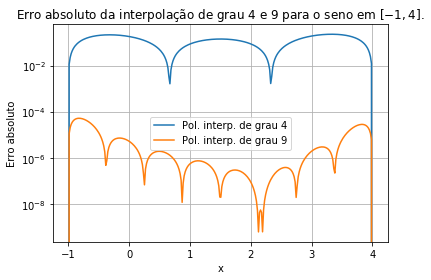

In [34]:
# Dados fornecidos
# ----------------
I  = [-1, 4]
ts = np.linspace(I[0], I[1], num=300)
f  = np.sin

# Encontrando os ys
# -----------------
xs_4 = np.linspace(I[0], I[1], num=4) # Para o polinômio interpolador de grau 4
xs_9 = np.linspace(I[0], I[1], num=9) # Para o polinômio interpolador de grau 9

sin_interpolado_4 = lagrange(xs_4, f(xs_4))
sin_interpolado_9 = lagrange(xs_9, f(xs_9))

err_4 = np.abs( f(ts) - sin_interpolado_4(ts) )
err_9 = np.abs( f(ts) - sin_interpolado_9(ts) )

# Criando a Imagem
# ----------------
plt.plot(ts, err_4, label='Pol. interp. de grau 4')
plt.plot(ts, err_9, label='Pol. interp. de grau 9')

plt.title('Erro absoluto da interpolação de grau 4 e 9 para o seno em $[-1,4]$.')
plt.legend()
plt.grid()
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('Erro absoluto')
ax.set_yscale('log')
plt.show()

In [47]:
# A curva azul não passa no asser :/ 
# É por causa da `lagrange`

for l in ax.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    try:
        assert 1e-5 <= max(ydata) <=  0.035
    except AssertionError:
        print(f'Bateu {max(ydata)} em {l}')

Bateu 0.2305651143956447 em Line2D(Pol. interp. de grau 4)


In [35]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [36]:
for l in ax.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) == -1
    assert max(xdata) ==  4

    assert 1e-5 <= max(ydata) <=  0.035
    assert min(ydata) >=  0

AssertionError: 

In [32]:
ax = None

Agora, faça os gráficos dos erros correspondentes às derivadas,
ou seja, o quanto a derivada da interpolação está longe da derivada real da função.

In [ ]:
# Dados fornecidos
# ----------------
I  = [-1, 4]
ts = np.linspace(I[0], I[1], num=300)
f = np.sin
deriv  = np.cos

# Encontrando os ys
# -----------------
xs_4 = np.linspace(I[0], I[1], num=4) # Para o polinômio interpolador de grau 4
xs_9 = np.linspace(I[0], I[1], num=9) # Para o polinômio interpolador de grau 9

sin_der_interpolado_4 = lagrange_linha(xs_4, f(xs_4))
sin_der_interpolado_9 = lagrange_linha(xs_9, f(xs_9))

err_4 = np.abs( deriv(ts) - sin_der_interpolado_4(ts) )
err_9 = np.abs( deriv(ts) - sin_der_interpolado_9(ts) )

# Criando a Imagem
# ----------------
plt.plot(ts, err_4, label='Pol. interp. de grau 4')
plt.plot(ts, err_9, label='Pol. interp. de grau 9')

plt.title('Erro absoluto da interpolação da derivada de grau 4 e 9 para o seno em $[-1,4]$.')
plt.legend()
plt.grid()
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('Erro absoluto')
ax.set_yscale('log')
plt.show()

In [ ]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [ ]:
for l in ax.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) == -1
    assert max(xdata) ==  4

    assert max(ydata) <=  0.25
    assert min(ydata) >=  0

In [ ]:
ax = None

Enfim, faça dois gráficos dos erros absolutos para o seno e sua derivada,
à esquerda a partir do polinômio interpolador de grau 4, e à direita a partir do de grau 9.

In [ ]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12,4))

# YOUR CODE HERE
raise NotImplementedError()
plt.show()

In [ ]:
assert len(ax1.lines) == 2

for l in ax1.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) == -1
    assert max(xdata) ==  4

    assert max(ydata) <=  0.25

In [ ]:
assert len(ax2.lines) == 2

for l in ax2.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) == -1
    assert max(xdata) ==  4

    assert max(ydata) <=  1e-3

In [ ]:
ax1 = None
ax2 = None

- O que você observa nestes dois gráficos, quanto ao erro da derivada?
- Como esses erros se comparam com os erros de estimativa da função propriamente dita?
- Como você explicaria este(s) fenômeno(s)?

YOUR ANSWER HERE

## Questão 3: Interpolando a derivada

Escreva uma função que, dados os pontos $(x_i, y_i)$,
retorna o polinômio interpolador correspondente à estimativa da derivada central gerada por estes pontos.
(você pode supor que as abscissas $x_i$ estão em ordem).

Dica: quais são as abscissas das derivadas centrais?

In [ ]:
def lagrange_central(xs, ys):
    assert len(xs) == len(ys)
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
f = lagrange_central([0,1,2], [3,2,3])
assert veryclose(f([0,1,2]), [-2, 0 , 2])

In [ ]:
f = lagrange_central([0,1,2,3], [3,2,3,2])
assert np.allclose(f([.3, 1.5, 2.8]), [-1.88, 1, -2.38])

## Questão 4: Mais gráficos

Agora, faça os gráficos de erros absolutos para a derivada, usando polinômios de grau 4 e 9, novamente.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
ax = plt.gca()
plt.show()

In [ ]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [ ]:
for l in ax.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) == -1
    assert max(xdata) ==  4

    assert max(ydata) <=  0.35
    assert min(ydata) >=  0

In [ ]:
ax = None

Novamente, faça lado a lado o gráfico para graus 4 e 9,
só que agora para o erro cometido pelos dois métodos diferentes de estimativa da derivada.

In [ ]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12,4))

# YOUR CODE HERE
raise NotImplementedError()
plt.show()

In [ ]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2

for l in ax1.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) == -1
    assert max(xdata) ==  4

    assert 0.1 <= max(ydata) <=  0.35
    assert min(ydata) >=  0

In [ ]:
assert len(ax2.lines) == 2
assert len(ax2.legend().texts) == 2

for l in ax2.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) == -1
    assert max(xdata) ==  4

    assert 4e-4 <= max(ydata) <=  0.02
    assert min(ydata) >=  0

In [ ]:
ax1 = None
ax2 = None

- Qual método produziu menores erros?
- Qual método melhor aproveitou a maior quantidade de pontos disponíveis?

Como você explicaria estas conclusões?

YOUR ANSWER HERE

# Parte 2: Integração e regressão

Imagine que temos alguns dados $(x_i, z_i)$, e queremos calcular a integral de $f$ no intervalo $I$.
Entretanto, os valores $z_i$ não são iguais a $y_i = f(x_i)$, mas contém um ruído $\varepsilon_i$,
que supomos pequeno, mas não nulo.
O objetivo desta parte da prova é estudar como os ruídos em $z_i$ se transformam em erros na estimativa da integral.

# Questão 5: Simpson

Dê abaixo a regra de Simpson para integrar funções dividindo um intervalo em $n$ partes iguais.
Este método é suficientemente preciso para ser usado como "referência".

In [85]:
def simpson(f, a, b, n=1000):
    ts,h = np.linspace(a,b,num=n+1,retstep=True)
    integral = 0
    for i in range(len(ts)-1):
        integral += h*(f(ts[i]) + 4*f((ts[i]+ts[i+1])/2) + f(ts[i+1]))/6
    return integral

In [86]:
assert np.isclose(simpson(np.sin, 0, np.pi, n=50), 2)
assert np.isclose(simpson(np.sin, 0, np.pi, n=500), 2, atol=1e-12, rtol=1e-12)

In [87]:
def f(x): return np.exp(x/4) - 0.7*np.sin(2.3*x)
assert np.isclose(simpson(f, -4, 10, n=50),   47.3929830436714)
assert  veryclose(simpson(f, -4, 10, n=2000), 47.3929830436714)

# Questão 6: Comparando integrais

Considere a função $f$ abaixo, e calcule o polinômio interpolador de $f$ nos 21 pontos $(x_i, y_i)$ dados.
Use-o para estimar a integral de $f$ no intervalo $[-2,3]$.

In [ ]:
def f(t):
    return np.exp(t/8)*np.sin(2*t) + np.exp(-t/9)*np.cos(np.pi*t)

npts = 21
xs = np.linspace(-2,3, num=npts)
ys = f(xs)

In [ ]:
def poly_int(coefs, a, b):
    """Calcula a integral do polinômio com coeficientes `coefs` dados em ordem crescente de grau, no intervalo [a,b]."""
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
### Dê sua resposta na forma I = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Teste aqui...

Agora, faça o mesmo com os pontos $(x_i, z_i)$, que estão sujeitos a um erro de "magnitude média" $0.1$.
Qual o erro de integração?

In [ ]:
np.random.seed(2)
A = 0.1
zs = ys + np.random.randn(len(ys))*A

In [ ]:
### Dê sua resposta na forma Iz = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Teste aqui...

## Questão 7: Comparando com o método de Simpson

Quantos intervalos são necessários para que o método de Simpson
tenha um erro menor do que usar o polinômio interpolador com os dados **corretos**?

In [ ]:
# Dê sua resposta na forma n_int = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Teste aqui...

Agora, supondo que você tem acesso **apenas aos pontos errados** $(x_i, z_i)$,
use-os como se fossem os valores do método de Simpson no intervalo $[-2,3]$.
Qual a estimativa da integral que você obtém?

In [ ]:
# Dê sua resposta na forma Iz_simp = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Teste aqui...

## Questão 8: Gráficos

Faça o gráfico dos erros de interpolação para a função $f$,
tanto para o polinômio interpolador com dados "certos" como para o polinômio gerado pelos dados com ruído.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
ax = plt.gca()
plt.show()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

for l in ax.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) == -2
    assert max(xdata) ==  3

    assert max(ydata) <=  40
    assert min(ydata) >=  0

In [ ]:
ax = None

Como o gráfico acima ajuda a explicar o erro de integração ao usar pontos com ruído?

YOUR ANSWER HERE

Faça o gráfico do erro de interpolação correspondente a usar o método de Simpson com os pontos $(x_i, z_i)$.

Atenção: Observe que o método de Simpson irá formar polinômios diferentes em intervalos diferentes.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
ax = plt.gca()
plt.show()

In [ ]:
for l in ax.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) >= -2
    assert max(xdata) <=  3

    assert 0.01 <= max(ydata) <=  1
    assert min(ydata) >=  0

In [ ]:
ax = None

## Questão 9: Regressão

Agora, vamos usar 21 pontos para ajustar um polinômio de grau 10.
Qual a estimativa da integral tanto para os pontos "certos" como para os pontos "com erro"?

In [90]:
def regres_coefs(xs, ys, deg):
    """Calcula os coeficientes da regressão polinomial. """
    assert len(xs) == len(ys)
    assert len(xs) > deg
    vander = np.vander(xs, deg+1) 
    coefs, *_ = np.linalg.lstsq(vander, ys, rcond=None) 
    return coefs

In [ ]:
### Dê a resposta na forma
#   I_certos = ...
#   I_ruidos = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert np.isclose(I_certos, -0.96, atol=1e-1, rtol=1e-1)
assert np.isclose(I_ruidos, -1.06, atol=1e-1, rtol=1e-1)

Mantendo o uso dos 21 pontos, varie o grau de regressão entre 0 e 18,
e faça um gráfico do erro de itegração tanto para o uso dos pontos corretos como dos pontos com ruído.

In [ ]:
graus = range(18+1)

ax = plt.gca()
plt.show()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

for l in ax.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) ==  0
    assert max(xdata) == 18

    assert max(ydata) <=  200
    assert min(ydata) >=  0

- Como o erro se comporta ao aumentar o grau, para cada método?
- Como interpretar o erro da integral ao usar uma regressão de grau zero?

YOUR ANSWER HERE

Agora, divida os 21 pontos em dois blocos de 11 (o do meio aparece nos dois!),
e ajuste dois polinômios, um para cada lado do intervalo de integração.
Novamente, faça o gráfico comparando o erro cometido ao usar os pontos certos e os com ruído,
em função do grau de interpolação.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
ax = plt.gca()
plt.show()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

for l in ax.lines:
    xdata = l.get_xdata()
    ydata = l.get_ydata()

    assert min(xdata) ==  0
    assert max(xdata) <= 10

    assert max(ydata) <=  2
    assert min(ydata) >=  0

In [ ]:
ax = None

## Questão 10: "Amostragem"

De maneira mais geral, o ruído que adicionamos a `ys` para formar o vetor `zs` poderia ter sido outro,
por exemplo variando a semente do gerador aleatório, sem mudar a "amplitude".

Faça, agora, o gráfico do erro de integração, para regressões de grau 0 a 18,
usando 6 amostras diferentes para `zs`,
e compare com o decaimento dos erros quando não há ruídos.

In [ ]:
np.random.seed(123)

# YOUR CODE HERE
raise NotImplementedError()

plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")
ax = plt.gca()
plt.show()

- O que você observa aqui?
- Qual ordem de regressão você escolheria, sem saber qual vai ser a realização do ruído?
- Porquê?

YOUR ANSWER HERE